# SBA

# import packages

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import missingno as msno
import time 
import sys
import os
import csv

import requests
import re

![SBA](https://youth.gov/sites/default/files/2021-08/SBA-Formatted.gif)

## Read Data

In [123]:
try:
    df = pd.read_csv('/home/apprenant/Documents/archive/SBAnational.csv')
except:
    df=pd.read_csv("/home/apprenant/Documents/DATA/loan_project/SBAnational.csv")

/tmp/ipykernel_61743/434493991.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/home/apprenant/Documents/DATA/loan_project/SBAnational.csv")


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

### Remove "A" in "ApprovalFY" column and replace it with "" then change type to int

In [125]:
%%timeit
df['ApprovalFY'] = df['ApprovalFY'].replace('A', '', regex=True).astype(int)

2.56 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Creat sweetvis Repport
![sweetvis](https://warehouse-camo.ingress.cmh1.psfhosted.org/210c4eb7317c8b0d2e7d0784b1a9697c096050ef/687474703a2f2f636f6f6c74696d696e672e636f6d2f53562f4c61796f75742d416e696d332e676966)

In [126]:
# report = sv.analyze(df)
# report.show_html('report.html')


##  The target feature (y) is : MSI_Status (CHGOFF and PIF)

In [127]:
df['MIS_Status'].value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

### Data cleaning

In [128]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,2001.143560,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,5.913846,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


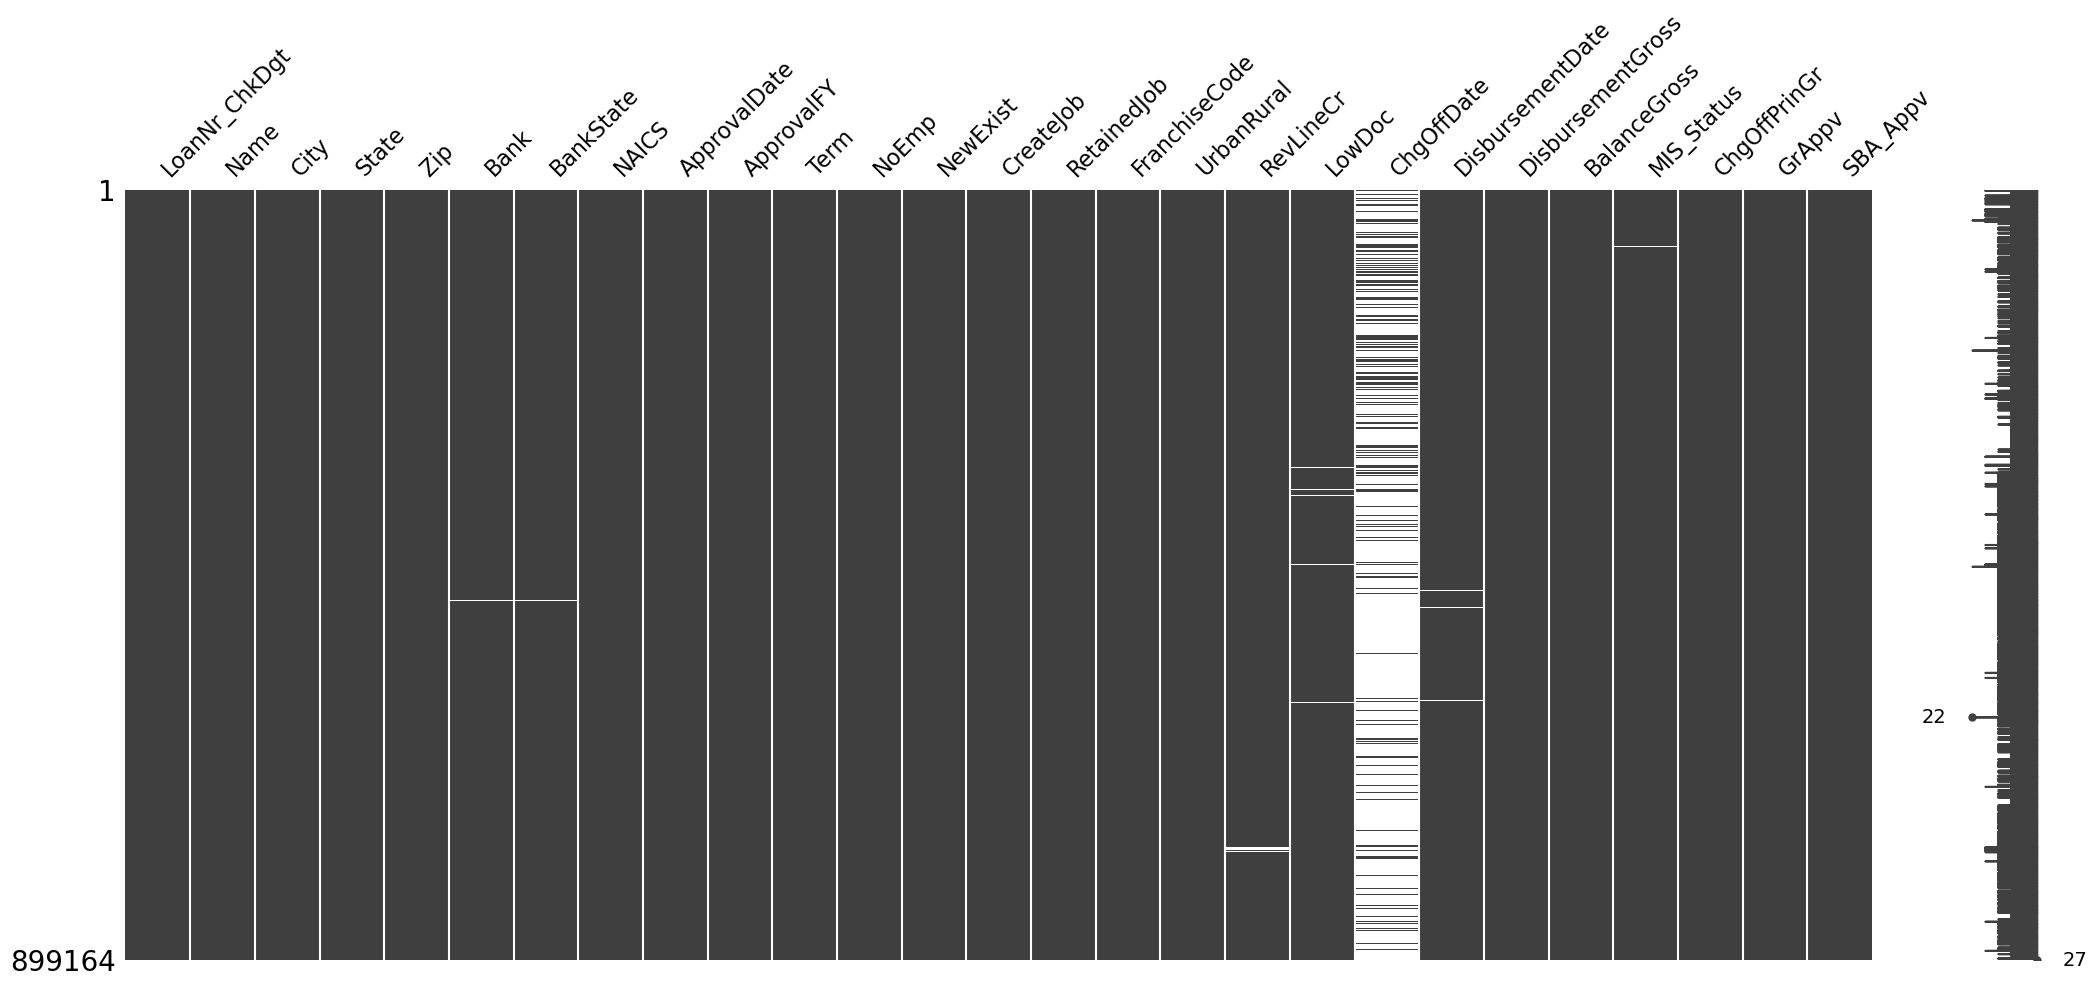

In [129]:
msno.matrix(df);

In [130]:
print(df.isnull().sum())

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64


### Replace "$" with "" in numeric columns

In [131]:
# create a list of all numeric columns
columns_to_transform_to_int = ["DisbursementGross","BalanceGross","ChgOffPrinGr","GrAppv","SBA_Appv"]


for col in columns_to_transform_to_int:
    df[col] = df[col].str.replace("$", "")
    df[col] = df[col].str.replace(",", "")
    df[col] = df[col].astype(float)
    

df['Term'] = df['Term'].astype(int)

/tmp/ipykernel_61743/4030755346.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace("$", "")


## Cleaning LowDoc column

In [132]:
df['LowDoc'] = df['LowDoc'].replace({'0': 'N'})
df['LowDoc'].value_counts()

N    784313
Y    110335
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

#### Keep only "N" and "Y"

In [133]:
df = df[df['LowDoc'].isin(['N','Y'])]
df['LowDoc'].value_counts()

N    784313
Y    110335
Name: LowDoc, dtype: int64

## Cleaning RevLineCr column

In [134]:
df['RevLineCr'] = df['RevLineCr'].replace({'0': 'N', 'T':'Y'})
df['RevLineCr'].value_counts()

N    674362
Y    215694
1        23
R        14
`        11
2         6
C         2
,         1
3         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

#### Keep only "N" and "Y"

In [135]:
df = df[df['RevLineCr'].isin(['N','Y'])]
df['RevLineCr'].value_counts()

N    674362
Y    215694
Name: RevLineCr, dtype: int64

### Find State's df missing values using Zip codes

In [136]:
# def getCityState(zipCode):
#     zipCode = str(zipCode)
#     url = "http://www.city-data.com/zips/" + zipCode + ".html"
#     r = requests.get(url)
#     data = r.text
#     soup = BeautifulSoup(data)
#     if soup.findAll(text="City:") ==[]:
#         cityNeeded = soup.findAll(text="Cities:")
#         for t in cityNeeded:
#             city_name = t.find_next('a').string
#             if city_name:
#                 return city_name
#                 time.sleep(0.5)
#     else:
#         cityNeeded = soup.findAll(text="City:")
#         for t in cityNeeded:
#             city_name = t.find_next('a').string
#             if city_name:
#                 return city_name
#                 time.sleep(0.5)
#     return None


# df['Zip'] = df['Zip'].astype(int)


# # Find the rows where the 'State' column is missing
# missing_state_rows = df[df['State'].isnull()]

# # Use the 'apply' function to apply the 'getCityState' function to the 'Zip' column of the missing rows
# missing_state_rows['State'] = missing_state_rows['Zip'].apply(lambda x: getCityState(x))

# # Update the original DataFrame with the new values for the 'State' column
# df.update(missing_state_rows)

# df['State'] = df['State'].str[-2:]


# df[df['State'].isna()]


### We still have 3 States missing values bescause of there non valide Zip code

## Drop not important features

In [137]:
dictionnaire =  {"11":"Agriculture, forestry, fishing and hunting","72":"Accommodation and food services","21":"Mining, quarrying, and oil and gas extraction","22":
"Utilities","23":"Construction","31":"Manufacturing","32":"Manufacturing","33":"Manufacturing","42":"Wholesale trade","44":"Retail trade","45":"Retail trade","48":" Transportation and warehousing", "49":"Transportation and warehousing", "51":"Information","52":"Finance and insurance", "53":"Real estate and rental and leasing","54":"Professional, scientific, and technical services","55":"Management of companies and enterprises","56":"Administrative and support and waste management and remediation services","61":"Educational services","62":"Health care and social assistance","71":"Arts, entertainment, and recreation","81":"Other services (except public administration)", "92": "Public administration", "0" : "Other"}

df['NAICS'] = df['NAICS'].astype(str).str[:2]

df["Categorie_NAICS"] = df["NAICS"].map(dictionnaire)

# df.Categorie.value_counts(dropna=False)

df["Categorie_NAICS"].value_counts(dropna=False)

Other                                                                       199600
Retail trade                                                                126049
Other services (except public administration)                                72040
Professional, scientific, and technical services                             67422
Manufacturing                                                                67327
Accommodation and food services                                              67057
Construction                                                                 65950
Health care and social assistance                                            54833
Wholesale trade                                                              48361
Administrative and support and waste management and remediation services     32313
 Transportation and warehousing                                              20061
Arts, entertainment, and recreation                                          14468
Real

In [138]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'Categorie_NAICS'],
      dtype='object')

In [139]:
cols_to_drop = ['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'BankState', 'ApprovalDate', 'CreateJob','RetainedJob','ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'SBA_Appv', 'ChgOffPrinGr']
df_cleaned = df.copy()
df_cleaned.drop(columns=cols_to_drop, inplace=True)


## Drop from df all missing values in columne "MSI_Status"

In [140]:
df_cleaned.dropna(subset=['MIS_Status'], inplace=True)


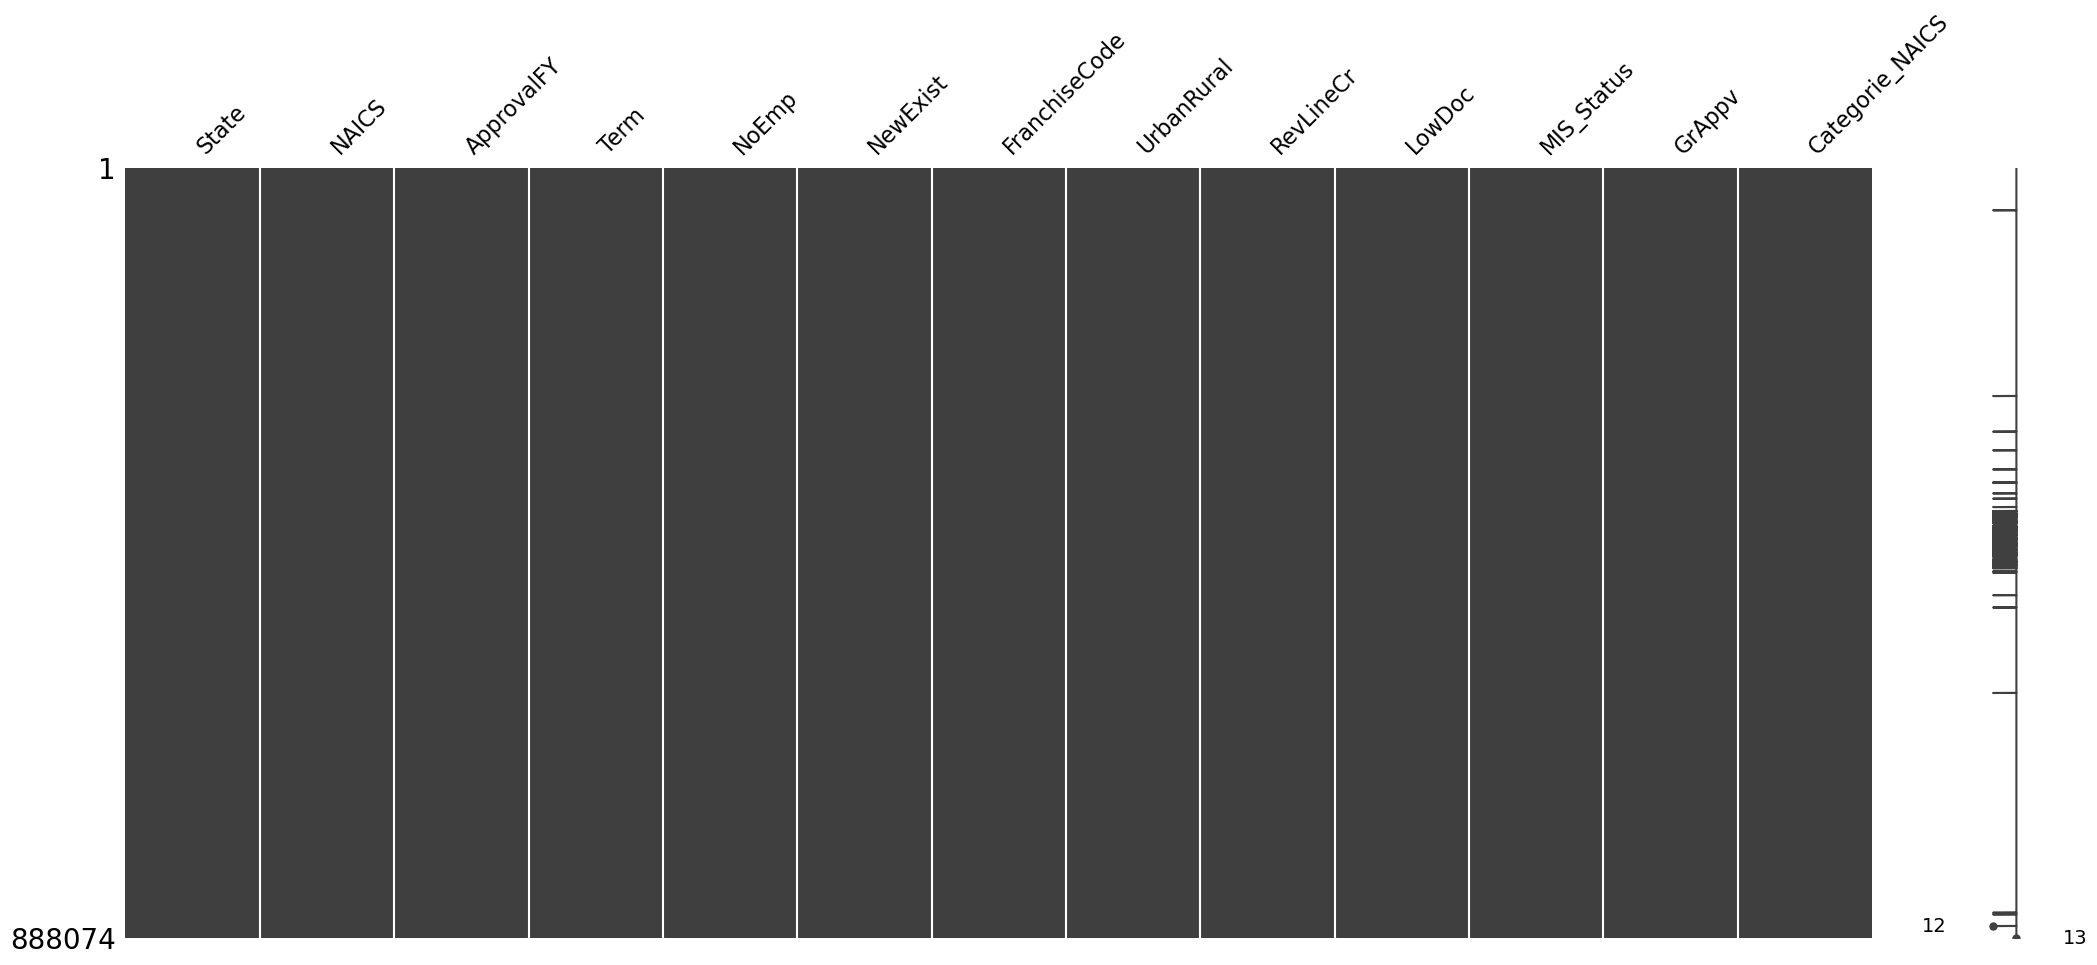

In [141]:
msno.matrix(df_cleaned);

In [142]:
df_cleaned.isna().sum()

State               13
NAICS                0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist           130
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
MIS_Status           0
GrAppv               0
Categorie_NAICS      0
dtype: int64

## Sum of Gross amount of loan approved
![All](https://media.tenor.com/6Hixx4SFAeQAAAAM/backing-you-get-yours.gif)

In [143]:
print(df['GrAppv'].sum())

171682877940.0


In [144]:
y = df_cleaned.MIS_Status
X = df_cleaned.drop(columns=['MIS_Status'])

# Feature Selection

There are several ways to test the feature importance in a machine learning classification model. Some popular methods include:

- `Permutation Importance`: This method involves shuffling the values of a single feature and measuring the change in the model's performance. The idea is that if a feature is important, then shuffling its values should have a large impact on the model's performance.

- `Feature Importance from Tree-based Models`: Tree-based models like decision trees, random forests, and gradient boosting machines, can directly compute feature importance by looking at how much each feature contributes to the final decision. These models typically have an attribute such as feature_importances_ or coef_ which can be used to extract feature importance.

- `Recursive Feature Elimination (RFE)`: This method involves fitting the model with all the features and then recursively removing the feature with the lowest importance until a desired number of features is reached. The final set of features selected by this method is considered to be the most important.

- `LASSO Regression`: Lasso regression is a linear model that can be used for feature selection. It works by adding a penalty term to the linear regression model that shrinks the coefficients of less important features towards zero.

- `Partial dependence plots`: These plots show the relationship between a feature and the model's predictions. They can be used to understand how a feature affects the model's predictions and identify the most important features.

These are just a few of the many methods available for testing feature importance. The best method to use will depend on the specific model and dataset you're working with.

It's worth to mention that, feature importance can be influenced by the data distribution, data scale, data leakage, the model used, and the evaluation metric. Therefore, it's important to be careful interpreting the results of feature importance, and to use other techniques like cross-validation, permutation test, and visualization to confirm the feature importance.

### Permutation Importance 
is a technique you can use to determine the importance of each feature in your dataset. Here's an example of how you can implement permutation importance with your binary classification dataset:

1. First, you'll need to train a model on your dataset. For example, you can use a RandomForestClassifier or any other classifier model of your choice.

2. Next, you'll want to evaluate the model's performance using a performance metric such as accuracy, f1-score, or roc-auc.

3. Once you have a trained model and a performance metric, you can use the permutation_importance function from the sklearn.inspection library to measure the importance of each feature. This function takes the trained model, the input data, and the target variable as arguments.

In [145]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.9, random_state=42)

In [146]:
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
# sklearn.compose: The sklearn.compose module is a submodule of the sklearn library for machine learning in Python. It provides functions for creating complex preprocessing and modeling pipelines.
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
#sklearn.preprocessing: The sklearn.preprocessing module is a submodule of the sklearn library that provides functions for preprocessing data, such as scaling and normalizing features, imputing missing values, and encoding categorical variables.
from sklearn.linear_model import Ridge,LinearRegression,Lasso, ElasticNet
# sklearn.linear_model: The sklearn.linear_model module is a submodule of the sklearn library that provides functions for fitting linear models for regression and classification.
from sklearn.pipeline import make_pipeline
# sklearn.pipeline: The sklearn.pipeline module is a submodule of the sklearn library that provides functions for creating and working with pipelines of transformers and models.
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV, cross_val_score, KFold
# sklearn.model_selection: The sklearn.model_selection module is a submodule of the sklearn library that provides functions for splitting data into training and test sets, evaluating models using cross-validation, and hyperparameter tuning.
from sklearn.dummy import DummyRegressor
# sklearn.dummy: The sklearn.dummy module is a submodule of the sklearn library that provides simple dummy models for regression and classification.


from sklearn.impute import SimpleImputer
import numpy as np

def make_pipeline_to_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude= np.number)
    numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler(with_mean=False))
    categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                    (categorical_pipeline, categorical_features)
                                    )
    return preprocessor, X_train, X_test, y_train, y_test


# Create the pipeline
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

# RandomForest
![forest](https://thumbs.gfycat.com/UncomfortableWelllitDrever-size_restricted.gif)

In [147]:
from sklearn.ensemble import RandomForestClassifier


# Add the RandomForestClassifier to the pipeline
clf = make_pipeline(preprocessor, RandomForestClassifier(random_state=42, max_depth = 10, class_weight='balanced'))

# Fit the pipeline on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.8565323874672747
f1_score: 0.7898652045000139


In [148]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      CHGOFF       0.56      0.83      0.67     31281
       P I F       0.96      0.86      0.91    146334

    accuracy                           0.86    177615
   macro avg       0.76      0.85      0.79    177615
weighted avg       0.89      0.86      0.87    177615



In [149]:
# create a new dataframe with feature names as index and feature importances as values
df_importances = pd.DataFrame({'feature_importance': clf.steps[1][1].feature_importances_}, index=clf.steps[0][1].get_feature_names_out())

# sort the dataframe by feature importances
df_importances.sort_values(by='feature_importance', ascending=False, inplace=True)

In [150]:
df_importances.head(20)

,feature_importance
pipeline-1__Term,0.528106
pipeline-1__ApprovalFY,0.140921
pipeline-1__FranchiseCode,0.073273
pipeline-1__UrbanRural,0.063764
pipeline-1__GrAppv,0.056104
pipeline-1__NoEmp,0.019749
pipeline-2__Categorie_NAICS_Other,0.018829
pipeline-2__NAICS_0,0.015516
pipeline-2__RevLineCr_N,0.013472
pipeline-2__RevLineCr_Y,0.012866


In [151]:
# data = list(zip(clf.feature_names_in_, clf.steps[1][1].feature_importances_))
# df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
# df_importances

### SGDclassifier

In [154]:
from sklearn.linear_model import SGDClassifier 

#Initialiser le classifieur
clf = make_pipeline(preprocessor,SGDClassifier())

#Entrainer le classifieur
clf.fit(X_train, y_train)

#Faire des prédictions avec le classifieur
y_pred = clf.predict(X_test)